**Tytuł**

*Kursywa*

###### Nagłówek

Zmiena `lr` to model

Wyliczanka
1. raz
2. dwa

Niewyliczanka:
- raz
* dwa
+ trzy

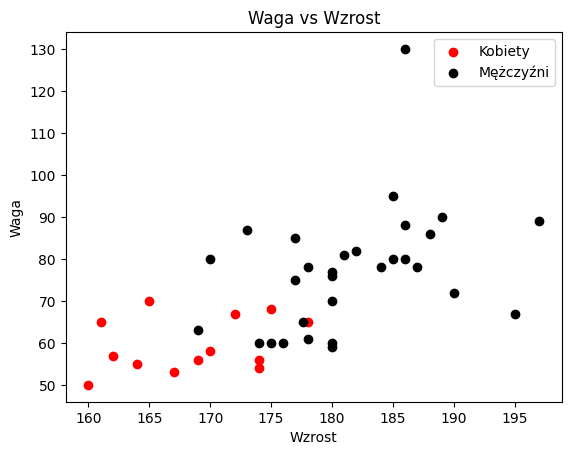

In [81]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_excel("pomiary2017.xlsx")

df = df.to_numpy()
df[1][4], df[1][5] = df[1][5], df[1][4]

wzrost = df[:, 5]

df[3][5] = float(np.nanmean(wzrost).round(2))

waga = df[:, -3]

plec = df[:, -1]

wzrost, waga, plec

plt.scatter(wzrost[plec == 'K'], waga[plec == 'K'], c='red', label='Kobiety')
plt.scatter(wzrost[plec == 'M'], waga[plec == 'M'], c='black', label='Mężczyźni')
plt.xlabel('Wzrost')
plt.ylabel('Waga')
plt.title('Waga vs Wzrost')
plt.legend()
plt.show()


In [82]:
from sklearn.neighbors import NearestNeighbors

wzrost.ndim, wzrost.shape, wzrost.size

(1, (43,), 43)

In [83]:
tab1 = np.array([3])
tab2 = np.array([[3]])

def wypisz_tablice(tab):
    print(tab.shape, tab.ndim, tab.size)

wypisz_tablice(tab1)
wypisz_tablice(tab2)

tab = np.arange(12)

wypisz_tablice(tab)

tab2 = tab.reshape(3,-1)
wypisz_tablice(tab2)

wzrost.reshape(1, -1)

wzrost[np.newaxis, :].shape

ramka = pd.DataFrame({
    "wzrost": wzrost,
    "waga": waga,
})


ramka.head()

features = np.column_stack((wzrost, waga))
features

(1,) 1 1
(1, 1) 2 1
(12,) 1 12
(3, 4) 2 12


array([[184.0, 78],
       [187, 78.0],
       [178.0, 78],
       [177.6, 65],
       [175.0, 60],
       [197.0, 89],
       [182.0, 82],
       [172.0, 67],
       [180.0, 70],
       [181.0, 81],
       [185.0, 95],
       [180.0, 77],
       [185.0, 80],
       [177.0, 85],
       [174.0, 56],
       [190.0, 72],
       [162.0, 57],
       [186.0, 88],
       [178.0, 61],
       [167.0, 53],
       [186.0, 80],
       [174.0, 60],
       [165.0, 70],
       [178.0, 65],
       [174.0, 54],
       [170.0, 80],
       [175.0, 68],
       [160.0, 50],
       [186.0, 130],
       [173.0, 87],
       [180.0, 76],
       [180.0, 60],
       [195.0, 67],
       [177.0, 75],
       [170.0, 58],
       [164.0, 55],
       [169.0, 56],
       [169.0, 63],
       [188.0, 86],
       [161.0, 65],
       [189.0, 90],
       [180.0, 59],
       [176.0, 60]], dtype=object)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier(n_neighbors=1)

plec_num = np.where(plec == 'K', 0, 1)

features_train, features_test, target_train, target_test = train_test_split(features, plec_num, random_state=42)

predictor = knn.fit(features_train, target_train)

def mse(pred, actual):
    return 1/len(pred) * sum((pred - actual) ** 2) * 100

prediction = knn.predict(features_test)

mean_squared_error(target_test, prediction)

0.36363636363636365